<h1>Лабораторная работа №2. Обработка пропусков данных, кодирование категориальных признаков, масштабирование данных.<h1>
<h2>1) Обработка пропусков данных<h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# df = pd.read_csv('states_all.csv')
df = pd.read_csv('characters_tv.csv')
# df = pd.read_csv('dc-wikia-data.csv')
# df = pd.read_csv('HRDataset_v14.csv')
# df = pd.read_csv('FIFA 2018 Statistics.csv')

In [3]:
df.head()

,index,name,birthday,title,characterName,characterYear,characterAge,characterGender,loveInterest
0,0,Ben Platt,09/24/1993,The Politician,Payton Hobart,hs senior,NaN,M,"Alice Charles, Astrid Sloan, River Barkley\r"
1,1,Zoey Deutch,11/10/1994,The Politician,Infinity Jackson,hs senior,NaN,F,NaN
2,2,Lucy Boynton,01/17/1994,The Politician,Astrid Sloan,hs senior,NaN,F,"Payton Hobart, River Barkley\r"
3,3,Julia Schlaepfer,03/03/1995,The Politician,Alice Charles,hs senior,NaN,F,"Payton Hobart, James Sullivan\r"
4,4,Laura Dreyfuss,08/22/1988,The Politician,McAfee Westbrook,hs senior,NaN,F,Skye Leighton


In [4]:
df.shape

(243, 9)

In [5]:
df.dtypes

index                int64
name                object
birthday            object
title               object
characterName       object
characterYear       object
characterAge       float64
characterGender     object
loveInterest        object
dtype: object

In [6]:
# отбор числовых колонок
df_num = df.select_dtypes(include=[np.number])
num_cols = df_num.columns.values
print(num_cols)

['index' 'characterAge']


In [7]:
# отбор нечисловых колонок
df_non_num = df.select_dtypes(exclude=[np.number])
non_num_cols = df_non_num.columns.values
print(non_num_cols)

['name' 'birthday' 'title' 'characterName' 'characterYear'
 'characterGender' 'loveInterest']


In [8]:
def print_missing_stat():
    for c in df.columns:
        pct_missing = np.mean(df[c].isnull())
        print('{} - {}%'.format(c, round(pct_missing * 100)))
print_missing_stat()

index - 0%
name - 0%
birthday - 7%
title - 0%
characterName - 0%
characterYear - 54%
characterAge - 46%
characterGender - 0%
loveInterest - 46%


In [9]:
# Выберем числовые колонки с пропущенными значениями
num_miss_cols = []
for c in df.columns:
    temp_count = df[df[c].isnull()].shape[0]
    dt = str(df[c].dtype)
    if temp_count > 0 and (dt == 'float64' or dt == 'int64' or dt == 'object'):
        num_miss_cols.append(c)
        print('Столбец {}. Тип данных: {}. Пустых значений {} из {}'.format(c, dt, temp_count, df[c].shape[0]))

Столбец birthday. Тип данных: object. Пустых значений 16 из 243
Столбец characterYear. Тип данных: object. Пустых значений 132 из 243
Столбец characterAge. Тип данных: float64. Пустых значений 112 из 243
Столбец loveInterest. Тип данных: object. Пустых значений 111 из 243


Для нечисловых признаков, заменим пропуски на ```_MISSING_```.
Для числовых признаков, заменим пропуски на ```-999```.

In [10]:
for c in df.columns:
    if c in df_num:
        df[c] = df[c].fillna(-999)
    else:
        df[c] = df[c].fillna('__MISSING__')

In [11]:
print_missing_stat()

index - 0%
name - 0%
birthday - 0%
title - 0%
characterName - 0%
characterYear - 0%
characterAge - 0%
characterGender - 0%
loveInterest - 0%


<h2>2) Кодирование категориальных признаков <h2>

In [12]:
df.head()

,index,name,birthday,title,characterName,characterYear,characterAge,characterGender,loveInterest
0,0,Ben Platt,09/24/1993,The Politician,Payton Hobart,hs senior,-999.0,M,"Alice Charles, Astrid Sloan, River Barkley\r"
1,1,Zoey Deutch,11/10/1994,The Politician,Infinity Jackson,hs senior,-999.0,F,__MISSING__
2,2,Lucy Boynton,01/17/1994,The Politician,Astrid Sloan,hs senior,-999.0,F,"Payton Hobart, River Barkley\r"
3,3,Julia Schlaepfer,03/03/1995,The Politician,Alice Charles,hs senior,-999.0,F,"Payton Hobart, James Sullivan\r"
4,4,Laura Dreyfuss,08/22/1988,The Politician,McAfee Westbrook,hs senior,-999.0,F,Skye Leighton


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            243 non-null    int64  
 1   name             243 non-null    object 
 2   birthday         243 non-null    object 
 3   title            243 non-null    object 
 4   characterName    243 non-null    object 
 5   characterYear    243 non-null    object 
 6   characterAge     243 non-null    float64
 7   characterGender  243 non-null    object 
 8   loveInterest     243 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.2+ KB


In [14]:
category_cols = ['title', 'characterYear', 'loveInterest']

In [15]:
# Количество уникальных значений
for c in category_cols:
    print(f'{c}: {df[c].unique().size}')

title: 33
characterYear: 9
loveInterest: 124


In [16]:
for c in category_cols:
    df = pd.concat([df, pd.get_dummies(df[c])], axis=1)

In [17]:
df.head()

,index,name,birthday,title,characterName,characterYear,characterAge,characterGender,loveInterest,13 Reasons Why,...,"Summer Roberts, Anna Stern\r",Tabitha Foster,"Taylor Townsend, Marissa Cooper\r",Toni Shalifoe,Tyler Locke,Victor Salazar,"Victor Salazar, Andrew Spencer\r","Will LeClair, Harry Bingham\r","Zoya Lott, Julien Calloway\r",__MISSING__
0,0,Ben Platt,09/24/1993,The Politician,Payton Hobart,hs senior,-999.0,M,"Alice Charles, Astrid Sloan, River Barkley\r",0,...,0,0,0,0,0,0,0,0,0,0
1,1,Zoey Deutch,11/10/1994,The Politician,Infinity Jackson,hs senior,-999.0,F,__MISSING__,0,...,0,0,0,0,0,0,0,0,0,1
2,2,Lucy Boynton,01/17/1994,The Politician,Astrid Sloan,hs senior,-999.0,F,"Payton Hobart, River Barkley\r",0,...,0,0,0,0,0,0,0,0,0,0
3,3,Julia Schlaepfer,03/03/1995,The Politician,Alice Charles,hs senior,-999.0,F,"Payton Hobart, James Sullivan\r",0,...,0,0,0,0,0,0,0,0,0,0
4,4,Laura Dreyfuss,08/22/1988,The Politician,McAfee Westbrook,hs senior,-999.0,F,Skye Leighton,0,...,0,0,0,0,0,0,0,0,0,0


<h2>3) Масштабирование данных <h2>

В текущем датасете не нашлось признаков для масштабирования, поэтому возьмем другой.

In [18]:
data = pd.read_csv('Spotify 2010 - 2019 Top 100.csv')
data.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MinMax масштабирование:

In [20]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['bpm']])

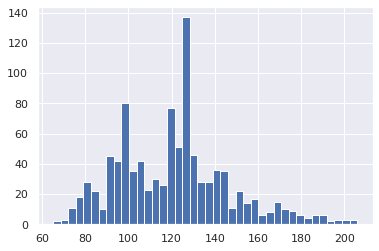

In [21]:
plt.hist(data['bpm'], 40)
plt.show()

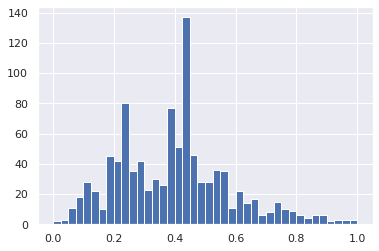

In [22]:
plt.hist(sc1_data, 40)
plt.show()

Масштабирование данных на основе Z-оценки:

In [23]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['bpm']])

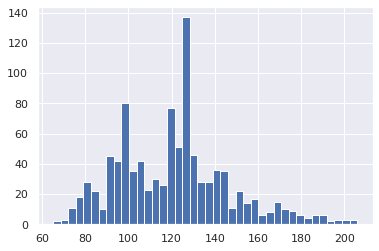

In [24]:
plt.hist(data['bpm'], 40)
plt.show()

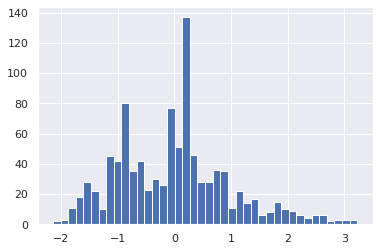

In [25]:
plt.hist(sc2_data, 40)
plt.show()